In [84]:
"""python 3 version
Author @Gautam Kumar"""
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
#importing Dataset
myData=pd.read_csv('Mall_Customers.csv')
myData.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


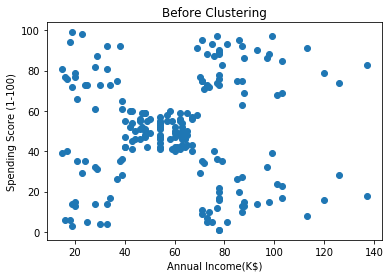

In [92]:
myData.isnull().sum()
xData=myData.iloc[:,[3]].values
yData=myData.iloc[:,[4]].values
plt.scatter(xData,yData)
plt.title('Before Clustering')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [93]:
x=myData.iloc[:,[3,4]].values

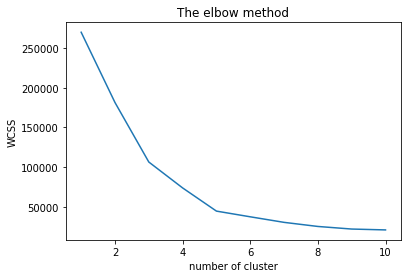

In [88]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')
plt.show()

In [89]:
#applying the kmeans clustering on mall data 
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


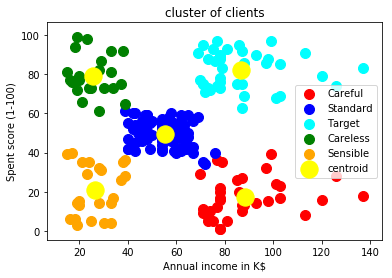

In [90]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Careful')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Standard')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='cyan', label='Target')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='green', label='Careless')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='orange', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300,c='yellow', label='centroid')
plt.title('cluster of clients')
plt.xlabel('Annual income in K$')
plt.ylabel('Spent score (1-100)')
plt.legend()
plt.show()